### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 2
### Due: Friday, Sep 08 at 11:59 pm CT

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

## Problem 1

1) Use `numpy` to draw $1000$ random samples from a uniform distribution between $1$ and $10$, and store these samples as $x$.

2) Use matplotlib to make a histogram of these samples. Try to make this as aesthetically pleasing as possible (within reason).

3) Compute the exponential of your array $x$, and store this as $y$.

4) Make another histogram for $y$. Using the equation to transform probability distributions in `lecture_3`, write here what the theoretical pdf of $y$ is, and overplot it onto your histogram.

5) Compute the mean of $x$ and the mean of $y$. Now compute the median of $x$ and the median of $y$. How the mean and median of x and y compare to each other?

[2.9935751  4.52380299 8.20924238 1.15840132 2.22011948 8.34093226
 2.83822951 4.89664068 5.0964036  5.27951281 3.48618087 6.38148909
 7.60352667 1.15190767 5.38513275 5.48892961 7.7634041  9.6298957
 5.76136632 9.07222796 8.58101275 3.25072866 3.92065413 7.95992805
 4.17106952 7.32800486 3.29215564 4.6082964  5.46607376 3.27053968
 4.35297807 3.65062373 8.86171267 7.22544973 2.82625201 9.17563806
 6.54319181 7.26454538 1.49224789 7.66583177 9.72430506 8.48137188
 3.76842248 8.61738432 7.03976738 9.13563983 3.98456877 5.37648016
 6.26549264 9.8547607  7.49712928 1.25062698 5.4013156  8.37783546
 8.59243164 5.5452193  4.36300452 6.14130722 7.25809505 8.33289555
 2.59650214 5.1501086  5.17888572 1.33053257 9.73910102 6.76266427
 3.34535609 8.39455228 2.60474077 1.16574019 2.28338597 4.91860988
 4.35763096 6.5965971  4.45943133 1.20773447 6.88720048 4.89171015
 4.38162926 7.05280123 3.6120603  7.67993986 1.86875751 8.95443735
 2.49359875 6.78269129 3.55692386 4.08869467 4.93325327 6.63039

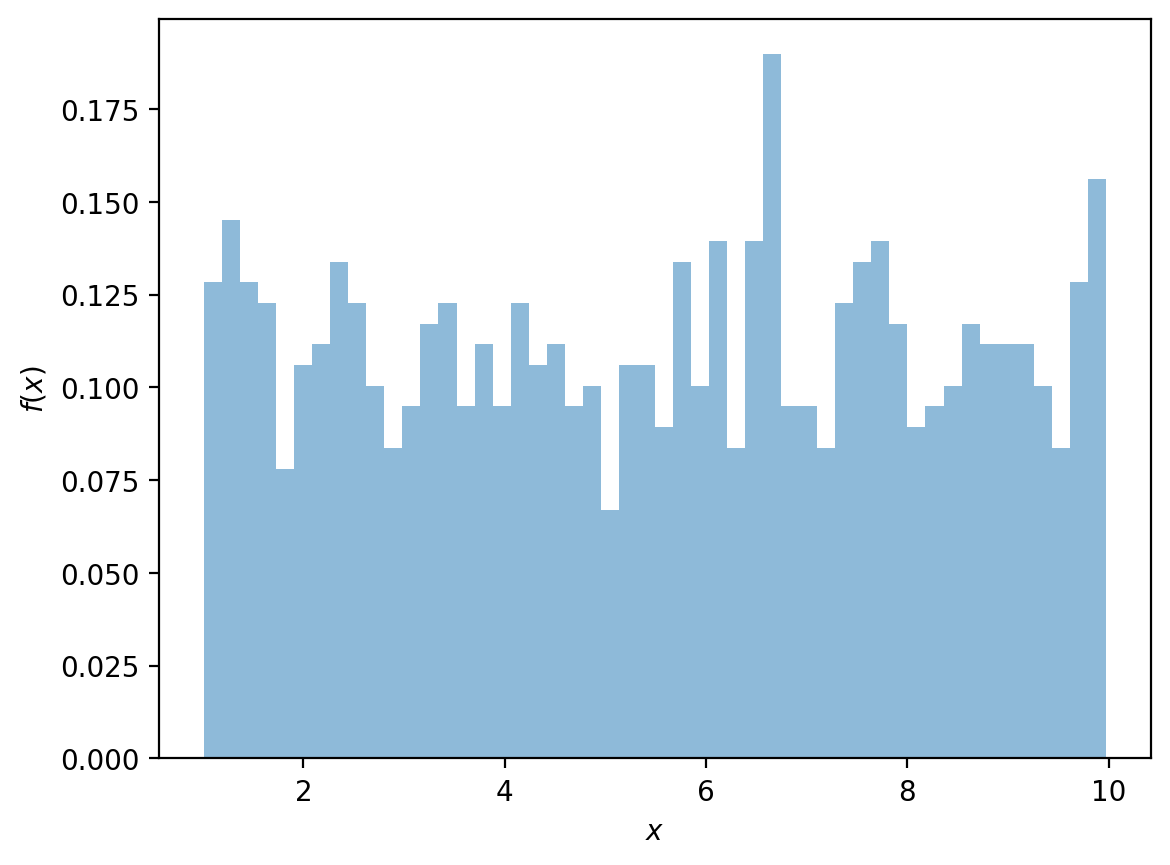

In [2]:
#1.
N =1000 # Complete
x = np.random.uniform(1,10,N) # Complete
print(x)
#x = distU.pdf(x=1) # pdf evaluated at x=1


#2
plt.hist(x, bins=50, density=True, alpha=0.5);
plt.xlabel('$x$');
plt.ylabel('$f(x)$');  

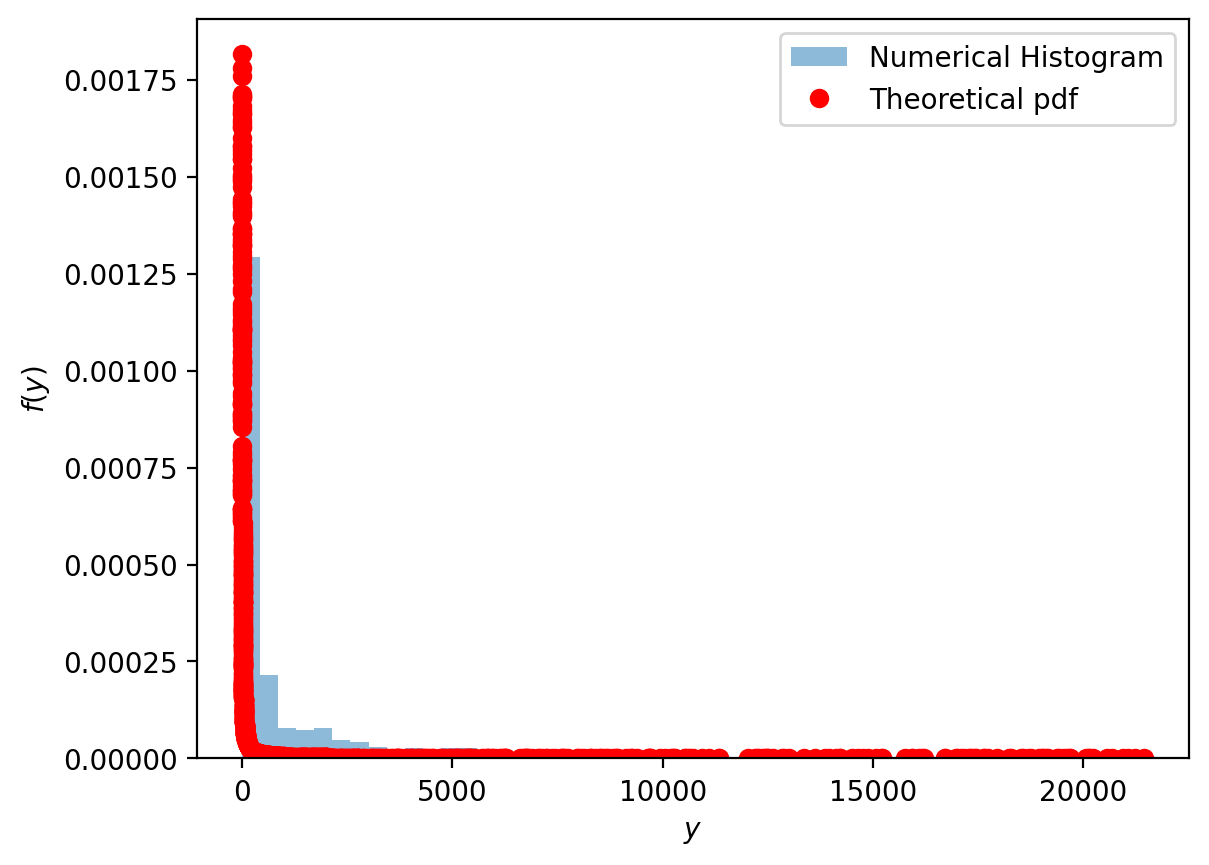

In [3]:
#3
y=np.exp(x)

#4
plt.hist(y, bins=50, density=True, alpha=0.5, label='Numerical Histogram');
plt.xlabel('$y$');
plt.ylabel('$f(y)$');  

#theoretical pdf of 𝑦 is (dx/dy)p(x)=1/y
#normalize to make a pdf
f=1/(200*y)
plt.plot(y,f,'o', color='red', label='Theoretical pdf')
plt.legend()
plt.show()

In [4]:
# 5 
mu_x=np.mean(x)
print(mu_x)
mu_y=np.mean(y)
print("Mean of y =", mu_y)

sigma_x=np.median(x)
print(sigma_x)
sigma_y=np.median(y)
print(sigma_y)

5.504296299885878
Mean of y = 2508.0273215802863
5.652546330839306
285.01717665726903


## Problem 2

This question is about Monte Carlo integration. The 3$\sigma$ Gaussian confidence level takes the form 

$$ \int_{-3}^{3} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) \,dx \approx 0.997625$$

1) Write down a python code to plot this Gaussian distribution. Can you tell what is the mean and standard daviation of this Gaussain?


2) Draw $N=10^5$ samples from a Gaussian distribution with mean 0 and standard deviation 3 and then perform Monte Carlo integration using the expression on the left hand side above. Confirm that this *approximately* matches the value given the right hand side of the equation.

3) Repeat (2) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

4) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

5) What if you had drawn N samples from a uniform distribution between $[-3, 3]$, how the accuracy of your results have changed?

In [5]:
#1
def Gaussian(x):
    y_fit = (1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)
    return y_fit
mu=0
sigma=1

#2
N=10**5
x = np.random.normal(0,3,N)
a=Gaussian(x)
np.histogram(a)

(array([47371,  7533,  5484,  4750,  4221,  4194,  4169,  4549,  5517,
        12212]),
 array([5.20923618e-50, 3.98942280e-02, 7.97884561e-02, 1.19682684e-01,
        1.59576912e-01, 1.99471140e-01, 2.39365368e-01, 2.79259596e-01,
        3.19153824e-01, 3.59048052e-01, 3.98942280e-01]))

In [6]:
# 5
#simplest way is to define the integrand

def Gaussian(x):
    y_fit = (1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)
    return y_fit

N=10000
x = np.random.uniform(-3,3,N)

Gaussian(x)
#range * sum / N for Monte Carlo Integration
6*np.sum(Gaussian(x))/N

0.9936184770407755

In [ ]:
#np.hist gives counts and bins (height and width) compute and add the areas --> for parts 2,3

In [7]:
distG = scipy.stats.norm(0,3) 
draws = distU.rvs(1000) # 1000 random draws
p = distU.pdf(x=0) # pdf evaluated at x=0

print(draws)
print(p)

xgrid = np.linspace(0,200,1000) # Array to sample the space 

# plot the distribution of means according to central limit theorem
plt.plot(xgrid, distG.pdf(xgrid)) # Complete

# Add a histogram that is the mean of 100,000 batches of N draws
yy = []
for i in np.arange(1000):
    xx = np.random.normal(100, 15, 10) # N random draws
    yy.append(np.mean(xx)) # Append average of those random draws to the end of the array



NameError: name 'distU' is not defined

## Problem 3
Let x be a continuous random variable with pdf given by $$p(x)=\frac{1}{2}e^{−|x|},$$ for all $x\in\mathbb{R}$. If $y=x^2$, find the cdf of y.

In [10]:
# lecture 2 or 3
import scipy
import numpy as np
distG=np.random.random()
pdf_x=.5*np.exp(-abs(x))
y=x**2
#pdf_y=((dy/dx)**-1)*pdf_x
pdf_y=(1/(2*x))*pdf_x
cdf_y=distG.cdf(x)
plt.plot(cdf_y)

AttributeError: 'float' object has no attribute 'cdf'

In [12]:
distG = scipy.stats.rv_continuous() # random distribution 
distU = .5*np.exp(-abs(distG))
p = distU.cdf() 

plt.plot(p, density=True)

TypeError: bad operand type for abs(): 'rv_continuous'